In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

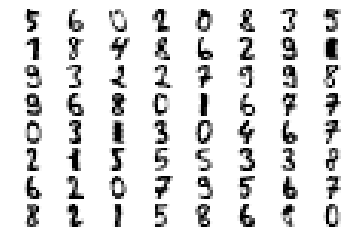

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.58362 stdev: 0.28378
Best fitness: 0.91218 - size: (2, 13) - species 5 - id 174
Average adjusted fitness: 0.474
Mean genetic distance 2.860, standard deviation 0.464
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 17.462 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.72765 stdev: 0.22722
Best fitness: 0.95547 - size: (3, 14) - species 5 - id 372
Average adjusted fitness: 0.615
Mean genetic distance 2.951, standard deviation 0.471
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.899 sec (18.181 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.73779 stdev: 0.23626
Best fitness: 0.95547 - size: (3, 14) - species 5 - id 372
Average adjusted fitness: 0.604
Mean genetic distance 2.986, standard deviation 0.462
Population of 199 members in 28 speci

Mean genetic distance 3.242, standard deviation 0.506
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 17.709 sec (16.212 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.55849 stdev: 0.20556
Best fitness: 0.85034 - size: (2, 13) - species 2 - id 51
Average adjusted fitness: 0.333
Mean genetic distance 2.916, standard deviation 0.458
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.203 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68242 stdev: 0.16576
Best fitness: 0.85034 - size: (2, 13) - species 2 - id 51
Average adjusted fitness: 0.489
Mean genetic distance 3.001, standard deviation 0.483
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 15.278 sec (14.740 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70301 stdev: 0.16735
Best fitness: 0.86951 - 

Population's average fitness: 0.59763 stdev: 0.08979
Best fitness: 0.77365 - size: (6, 21) - species 23 - id 938
Average adjusted fitness: 0.284
Mean genetic distance 3.092, standard deviation 0.460
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 17.418 sec (16.664 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.54580 stdev: 0.21363
Best fitness: 0.87570 - size: (2, 13) - species 5 - id 33
Average adjusted fitness: 0.369
Mean genetic distance 2.994, standard deviation 0.516
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.778 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67194 stdev: 0.17954
Best fitness: 0.90971 - size: (2, 14) - species 5 - id 369
Average adjusted fitness: 0.517
Mean genetic distance 3.059, standard deviation 0.508
Population of 201 members in 31 species
Total extinctions: 0
Generation time

Mean genetic distance 3.117, standard deviation 0.478
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 16.190 sec (15.132 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60866 stdev: 0.08766
Best fitness: 0.76809 - size: (3, 15) - species 28 - id 309
Average adjusted fitness: 0.255
Mean genetic distance 3.111, standard deviation 0.475
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 16.375 sec (15.339 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54776 stdev: 0.15252
Best fitness: 0.80767 - size: (2, 13) - species 1 - id 150
Average adjusted fitness: 0.318
Mean genetic distance 2.922, standard deviation 0.457
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.444 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60385 stdev: 0.13817
Best fitness: 0.8107

Population's average fitness: 0.56706 stdev: 0.06701
Best fitness: 0.71676 - size: (4, 19) - species 31 - id 825
Average adjusted fitness: 0.186
Mean genetic distance 2.988, standard deviation 0.458
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 15.685 sec (14.793 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57769 stdev: 0.06677
Best fitness: 0.72109 - size: (4, 13) - species 5 - id 928
Average adjusted fitness: 0.156
Mean genetic distance 2.983, standard deviation 0.472
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 15.777 sec (14.957 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.57101 stdev: 0.20271
Best fitness: 0.85652 - size: (2, 13) - species 4 - id 120
Average adjusted fitness: 0.417
Mean genetic distance 2.881, standard deviation 0.480
Population of 200 members in 21 species
Total extinctions

Mean genetic distance 3.058, standard deviation 0.461
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 15.484 sec (14.502 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61244 stdev: 0.09368
Best fitness: 0.76067 - size: (4, 17) - species 34 - id 813
Average adjusted fitness: 0.338
Mean genetic distance 3.094, standard deviation 0.461
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 15.822 sec (14.766 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62136 stdev: 0.09612
Best fitness: 0.77365 - size: (5, 18) - species 21 - id 895
Average adjusted fitness: 0.350
Mean genetic distance 3.113, standard deviation 0.482
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 16.185 sec (15.002 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53100 stdev: 0.14905
Be

Population's average fitness: 0.57361 stdev: 0.07345
Best fitness: 0.72789 - size: (3, 15) - species 21 - id 526
Average adjusted fitness: 0.187
Mean genetic distance 2.972, standard deviation 0.448
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 16.358 sec (15.301 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57626 stdev: 0.07669
Best fitness: 0.72789 - size: (5, 20) - species 23 - id 747
Average adjusted fitness: 0.208
Mean genetic distance 3.015, standard deviation 0.458
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 16.610 sec (15.563 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58457 stdev: 0.07947
Best fitness: 0.74644 - size: (4, 15) - species 26 - id 944
Average adjusted fitness: 0.175
Mean genetic distance 3.016, standard deviation 0.462
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 16.225 sec (15.673 average)
running

Mean genetic distance 3.038, standard deviation 0.494
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 15.229 sec (14.462 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55686 stdev: 0.07206
Best fitness: 0.73408 - size: (2, 15) - species 11 - id 452
Average adjusted fitness: 0.168
Mean genetic distance 3.079, standard deviation 0.497
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 15.899 sec (14.821 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56056 stdev: 0.07553
Best fitness: 0.73593 - size: (3, 16) - species 5 - id 803
Average adjusted fitness: 0.188
Mean genetic distance 3.095, standard deviation 0.485
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 16.280 sec (15.113 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56921 stdev: 0.07127
Best fitness: 0.74273 - size: (6, 22) - species 30 - id 898
A

Population's average fitness: 0.54901 stdev: 0.09716
Best fitness: 0.73964 - size: (2, 13) - species 19 - id 349
Average adjusted fitness: 0.233
Mean genetic distance 3.032, standard deviation 0.469
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 16.405 sec (15.413 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57662 stdev: 0.08888
Best fitness: 0.73964 - size: (2, 13) - species 19 - id 349
Average adjusted fitness: 0.197
Mean genetic distance 3.047, standard deviation 0.476
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 17.391 sec (15.907 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58520 stdev: 0.09215
Best fitness: 0.77365 - size: (3, 14) - species 35 - id 804
Average adjusted fitness: 0.240
Mean genetic distance 3.036, standard deviation 0.475
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 17.502 sec (16.226 average)

 *****

Mean genetic distance 2.992, standard deviation 0.498
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 16.365 sec (15.577 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57862 stdev: 0.07371
Best fitness: 0.73964 - size: (3, 15) - species 2 - id 335
Average adjusted fitness: 0.231
Mean genetic distance 3.038, standard deviation 0.495
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 17.630 sec (16.261 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59295 stdev: 0.07903
Best fitness: 0.73964 - size: (3, 15) - species 2 - id 335
Average adjusted fitness: 0.270
Mean genetic distance 3.103, standard deviation 0.498
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 19.083 sec (16.967 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58978 stdev: 0.08194
Best fitness: 0.73964 - size: (3, 15) - species 2 - id 335
Ave

Population's average fitness: 0.54336 stdev: 0.06916
Best fitness: 0.76438 - size: (2, 13) - species 6 - id 296
Average adjusted fitness: 0.200
Mean genetic distance 3.051, standard deviation 0.495
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 15.496 sec (15.239 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55803 stdev: 0.07517
Best fitness: 0.77056 - size: (3, 15) - species 3 - id 496
Average adjusted fitness: 0.177
Mean genetic distance 3.095, standard deviation 0.510
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 16.552 sec (15.677 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56896 stdev: 0.08628
Best fitness: 0.77056 - size: (3, 15) - species 1 - id 496
Average adjusted fitness: 0.251
Mean genetic distance 3.094, standard deviation 0.515
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 16.437 sec (15.867 average)

 ****** R

Mean genetic distance 2.832, standard deviation 0.449
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 16.075 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53449 stdev: 0.07278
Best fitness: 0.73408 - size: (3, 15) - species 5 - id 345
Average adjusted fitness: 0.214
Mean genetic distance 2.974, standard deviation 0.482
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 18.035 sec (17.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55544 stdev: 0.08087
Best fitness: 0.75015 - size: (3, 13) - species 11 - id 512
Average adjusted fitness: 0.196
Mean genetic distance 3.101, standard deviation 0.480
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 16.321 sec (16.810 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56921 stdev: 0.08797
Best fitness: 0.76129 - size: (3, 13) - species 16 - id 685
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.49225 stdev: 0.09768
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 199
Average adjusted fitness: 0.194
Mean genetic distance 2.884, standard deviation 0.462
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.521 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54115 stdev: 0.10279
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 199
Average adjusted fitness: 0.285
Mean genetic distance 2.986, standard deviation 0.514
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.456 sec (17.489 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55445 stdev: 0.10601
Best fitness: 0.73469 - size: (2, 13) - species 24 - id 199
Average adjusted fitness: 0.274
Mean genetic distance 3.021, standard deviation 0.521
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.780 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50352 stdev: 0.05771
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.189
Mean genetic distance 2.962, standard deviation 0.515
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.081 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53182 stdev: 0.06575
Best fitness: 0.74026 - size: (3, 15) - species 12 - id 234
Average adjusted fitness: 0.193
Mean genetic distance 3.065, standard deviation 0.507
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 16.640 sec (15.861 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55079 stdev: 0.07141
Best fitness: 0.74026 - size: (3, 15) - species 12 - id 234
Average adjusted fitness: 0.232
Mean genetic distance 3.089, standard deviation 0.503
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 16.553 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48262 stdev: 0.08616
Best fitness: 0.68213 - size: (2, 13) - species 3 - id 99
Average adjusted fitness: 0.190
Mean genetic distance 2.805, standard deviation 0.460
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 15.385 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53498 stdev: 0.09983
Best fitness: 0.78355 - size: (3, 13) - species 2 - id 355
Average adjusted fitness: 0.277
Mean genetic distance 2.935, standard deviation 0.488
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 16.982 sec (16.184 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56743 stdev: 0.09210
Best fitness: 0.78355 - size: (3, 13) - species 4 - id 355
Average adjusted fitness: 0.250
Mean genetic distance 3.011, standard deviation 0.476
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 16.946 sec (16.43


 ****** Running generation 0 ****** 

Population's average fitness: 0.48417 stdev: 0.10329
Best fitness: 0.73593 - size: (2, 13) - species 2 - id 111
Average adjusted fitness: 0.308
Mean genetic distance 2.923, standard deviation 0.458
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 17.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55177 stdev: 0.11723
Best fitness: 0.78169 - size: (2, 14) - species 5 - id 204
Average adjusted fitness: 0.320
Mean genetic distance 2.980, standard deviation 0.486
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.143 sec (17.454 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57047 stdev: 0.12012
Best fitness: 0.84663 - size: (3, 13) - species 8 - id 398
Average adjusted fitness: 0.314
Mean genetic distance 3.003, standard deviation 0.508
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.058 sec (18.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.45786 stdev: 0.14672
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 167
Average adjusted fitness: 0.266
Mean genetic distance 2.918, standard deviation 0.543
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 15.079 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57480 stdev: 0.14785
Best fitness: 0.79468 - size: (3, 15) - species 1 - id 311
Average adjusted fitness: 0.362
Mean genetic distance 2.983, standard deviation 0.510
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 15.623 sec (15.351 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59794 stdev: 0.14322
Best fitness: 0.79468 - size: (3, 15) - species 4 - id 311
Average adjusted fitness: 0.302
Mean genetic distance 3.035, standard deviation 0.496
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 16.535 sec (15.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.52247 stdev: 0.09773
Best fitness: 0.77056 - size: (2, 13) - species 4 - id 188
Average adjusted fitness: 0.287
Mean genetic distance 2.982, standard deviation 0.453
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.413 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56051 stdev: 0.09012
Best fitness: 0.78417 - size: (3, 15) - species 1 - id 323
Average adjusted fitness: 0.198
Mean genetic distance 2.996, standard deviation 0.480
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.777 sec (15.095 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58130 stdev: 0.08783
Best fitness: 0.78417 - size: (3, 15) - species 26 - id 323
Average adjusted fitness: 0.242
Mean genetic distance 3.050, standard deviation 0.496
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 16.434 sec (15.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50653 stdev: 0.06301
Best fitness: 0.68522 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.155
Mean genetic distance 2.879, standard deviation 0.451
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.879 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52854 stdev: 0.06866
Best fitness: 0.72294 - size: (2, 13) - species 5 - id 281
Average adjusted fitness: 0.207
Mean genetic distance 2.971, standard deviation 0.465
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 17.544 sec (17.711 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54692 stdev: 0.08142
Best fitness: 0.76747 - size: (3, 12) - species 2 - id 497
Average adjusted fitness: 0.181
Mean genetic distance 2.972, standard deviation 0.477
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.605 sec (18.34


 ****** Running generation 0 ****** 

Population's average fitness: 0.49628 stdev: 0.07120
Best fitness: 0.73408 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.247
Mean genetic distance 2.935, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 22.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54618 stdev: 0.06980
Best fitness: 0.73408 - size: (2, 13) - species 4 - id 133
Average adjusted fitness: 0.209
Mean genetic distance 2.992, standard deviation 0.486
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 23.770 sec (22.963 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56117 stdev: 0.07551
Best fitness: 0.75448 - size: (3, 16) - species 7 - id 460
Average adjusted fitness: 0.207
Mean genetic distance 3.020, standard deviation 0.484
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.880 sec (23.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.47797 stdev: 0.09495
Best fitness: 0.70563 - size: (2, 13) - species 2 - id 190
Average adjusted fitness: 0.150
Mean genetic distance 2.847, standard deviation 0.490
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 22.061 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53300 stdev: 0.09955
Best fitness: 0.70563 - size: (2, 13) - species 2 - id 190
Average adjusted fitness: 0.249
Mean genetic distance 2.992, standard deviation 0.487
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 23.906 sec (22.984 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56458 stdev: 0.09158
Best fitness: 0.72665 - size: (3, 16) - species 2 - id 532
Average adjusted fitness: 0.199
Mean genetic distance 3.112, standard deviation 0.495
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 27.907 sec (24.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.49938 stdev: 0.08055
Best fitness: 0.78293 - size: (2, 13) - species 3 - id 59
Average adjusted fitness: 0.238
Mean genetic distance 2.875, standard deviation 0.471
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 19.267 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53337 stdev: 0.09073
Best fitness: 0.82870 - size: (2, 14) - species 9 - id 377
Average adjusted fitness: 0.257
Mean genetic distance 2.959, standard deviation 0.468
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 19.580 sec (19.424 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56219 stdev: 0.08678
Best fitness: 0.82870 - size: (2, 14) - species 3 - id 377
Average adjusted fitness: 0.213
Mean genetic distance 2.930, standard deviation 0.471
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 21.651 sec (20.16


 ****** Running generation 0 ****** 

Population's average fitness: 0.46496 stdev: 0.11146
Best fitness: 0.76809 - size: (2, 13) - species 6 - id 111
Average adjusted fitness: 0.238
Mean genetic distance 2.935, standard deviation 0.472
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 19.428 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54556 stdev: 0.10526
Best fitness: 0.76809 - size: (2, 13) - species 9 - id 111
Average adjusted fitness: 0.263
Mean genetic distance 3.070, standard deviation 0.510
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 23.651 sec (21.539 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56491 stdev: 0.10809
Best fitness: 0.76809 - size: (2, 13) - species 9 - id 111
Average adjusted fitness: 0.279
Mean genetic distance 3.088, standard deviation 0.496
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 23.220 sec (22.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.49022 stdev: 0.10522
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 122
Average adjusted fitness: 0.218
Mean genetic distance 2.841, standard deviation 0.475
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.349 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55486 stdev: 0.11255
Best fitness: 0.74026 - size: (2, 12) - species 7 - id 328
Average adjusted fitness: 0.265
Mean genetic distance 2.954, standard deviation 0.496
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 19.719 sec (19.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57304 stdev: 0.11023
Best fitness: 0.74088 - size: (4, 17) - species 15 - id 407
Average adjusted fitness: 0.265
Mean genetic distance 2.989, standard deviation 0.489
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 21.380 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46473 stdev: 0.15202
Best fitness: 0.76933 - size: (2, 13) - species 4 - id 172
Average adjusted fitness: 0.263
Mean genetic distance 2.928, standard deviation 0.487
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 22.709 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56572 stdev: 0.15335
Best fitness: 0.81509 - size: (2, 14) - species 2 - id 289
Average adjusted fitness: 0.328
Mean genetic distance 3.016, standard deviation 0.486
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 26.268 sec (24.488 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60471 stdev: 0.14211
Best fitness: 0.81509 - size: (2, 14) - species 2 - id 289
Average adjusted fitness: 0.358
Mean genetic distance 3.034, standard deviation 0.489
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 24.245 sec (24.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49539 stdev: 0.06094
Best fitness: 0.63636 - size: (2, 13) - species 3 - id 195
Average adjusted fitness: 0.147
Mean genetic distance 2.962, standard deviation 0.501
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.259 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52243 stdev: 0.06466
Best fitness: 0.70130 - size: (3, 15) - species 6 - id 211
Average adjusted fitness: 0.171
Mean genetic distance 3.027, standard deviation 0.451
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 20.624 sec (20.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54144 stdev: 0.06592
Best fitness: 0.72727 - size: (4, 18) - species 28 - id 528
Average adjusted fitness: 0.148
Mean genetic distance 3.044, standard deviation 0.471
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 20.569 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48043 stdev: 0.09904
Best fitness: 0.69944 - size: (2, 13) - species 9 - id 199
Average adjusted fitness: 0.265
Mean genetic distance 2.875, standard deviation 0.456
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.878 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54623 stdev: 0.08782
Best fitness: 0.77860 - size: (3, 15) - species 7 - id 297
Average adjusted fitness: 0.267
Mean genetic distance 2.974, standard deviation 0.478
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.538 sec (19.208 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57578 stdev: 0.08793
Best fitness: 0.79716 - size: (3, 15) - species 7 - id 537
Average adjusted fitness: 0.202
Mean genetic distance 3.010, standard deviation 0.473
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 20.985 sec (19.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.49142 stdev: 0.10173
Best fitness: 0.78355 - size: (2, 13) - species 6 - id 77
Average adjusted fitness: 0.211
Mean genetic distance 2.861, standard deviation 0.462
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55736 stdev: 0.09452
Best fitness: 0.79716 - size: (3, 14) - species 6 - id 381
Average adjusted fitness: 0.263
Mean genetic distance 3.009, standard deviation 0.466
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.442 sec (20.203 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57667 stdev: 0.10220
Best fitness: 0.80025 - size: (3, 15) - species 6 - id 543
Average adjusted fitness: 0.221
Mean genetic distance 3.055, standard deviation 0.464
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 23.244 sec (21.21


 ****** Running generation 0 ****** 

Population's average fitness: 0.47063 stdev: 0.15920
Best fitness: 0.76994 - size: (2, 13) - species 5 - id 26
Average adjusted fitness: 0.223
Mean genetic distance 2.884, standard deviation 0.454
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 19.129 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53562 stdev: 0.15224
Best fitness: 0.76994 - size: (2, 13) - species 5 - id 26
Average adjusted fitness: 0.262
Mean genetic distance 2.931, standard deviation 0.487
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.333 sec (19.731 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58667 stdev: 0.14750
Best fitness: 0.77304 - size: (4, 16) - species 22 - id 522
Average adjusted fitness: 0.285
Mean genetic distance 2.955, standard deviation 0.505
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 21.704 sec (20.38


 ****** Running generation 0 ****** 

Population's average fitness: 0.47716 stdev: 0.09872
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 97
Average adjusted fitness: 0.244
Mean genetic distance 2.746, standard deviation 0.427
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 27.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53160 stdev: 0.10174
Best fitness: 0.74273 - size: (2, 14) - species 7 - id 310
Average adjusted fitness: 0.186
Mean genetic distance 2.832, standard deviation 0.487
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 24.371 sec (25.764 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54697 stdev: 0.10233
Best fitness: 0.75758 - size: (3, 15) - species 1 - id 536
Average adjusted fitness: 0.204
Mean genetic distance 2.923, standard deviation 0.493
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.825 sec (25.11


 ****** Running generation 0 ****** 

Population's average fitness: 0.46375 stdev: 0.15010
Best fitness: 0.74644 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.261
Mean genetic distance 2.859, standard deviation 0.494
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 24.042 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56128 stdev: 0.14837
Best fitness: 0.78541 - size: (3, 15) - species 1 - id 299
Average adjusted fitness: 0.283
Mean genetic distance 3.009, standard deviation 0.512
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 22.998 sec (23.520 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56991 stdev: 0.14803
Best fitness: 0.78541 - size: (3, 15) - species 1 - id 299
Average adjusted fitness: 0.305
Mean genetic distance 3.111, standard deviation 0.529
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 24.455 sec (23.83


 ****** Running generation 0 ****** 

Population's average fitness: 0.44284 stdev: 0.15035
Best fitness: 0.74892 - size: (2, 13) - species 7 - id 89
Average adjusted fitness: 0.227
Mean genetic distance 2.866, standard deviation 0.475
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 25.239 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54306 stdev: 0.15724
Best fitness: 0.76994 - size: (3, 15) - species 4 - id 291
Average adjusted fitness: 0.250
Mean genetic distance 3.008, standard deviation 0.494
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 24.875 sec (25.057 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59267 stdev: 0.15241
Best fitness: 0.81571 - size: (3, 15) - species 25 - id 473
Average adjusted fitness: 0.318
Mean genetic distance 3.027, standard deviation 0.480
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 24.928 sec (25.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.43666 stdev: 0.19781
Best fitness: 0.84601 - size: (2, 13) - species 1 - id 146
Average adjusted fitness: 0.266
Mean genetic distance 2.879, standard deviation 0.469
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 24.064 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59275 stdev: 0.20949
Best fitness: 0.84663 - size: (2, 14) - species 1 - id 304
Average adjusted fitness: 0.405
Mean genetic distance 2.987, standard deviation 0.483
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 24.820 sec (24.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65482 stdev: 0.17967
Best fitness: 0.84663 - size: (2, 14) - species 2 - id 304
Average adjusted fitness: 0.421
Mean genetic distance 2.980, standard deviation 0.485
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 24.357 sec (24.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.52265 stdev: 0.08528
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 116
Average adjusted fitness: 0.242
Mean genetic distance 2.856, standard deviation 0.465
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 23.565 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56028 stdev: 0.07884
Best fitness: 0.73593 - size: (2, 13) - species 5 - id 116
Average adjusted fitness: 0.271
Mean genetic distance 2.892, standard deviation 0.491
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 25.635 sec (24.600 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58203 stdev: 0.07377
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 116
Average adjusted fitness: 0.232
Mean genetic distance 2.917, standard deviation 0.509
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 24.650 sec (24.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.50059 stdev: 0.05650
Best fitness: 0.69944 - size: (2, 13) - species 4 - id 130
Average adjusted fitness: 0.146
Mean genetic distance 2.870, standard deviation 0.452
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.919 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54533 stdev: 0.06733
Best fitness: 0.71429 - size: (3, 15) - species 2 - id 311
Average adjusted fitness: 0.170
Mean genetic distance 2.925, standard deviation 0.460
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 21.830 sec (21.375 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55774 stdev: 0.06655
Best fitness: 0.73964 - size: (4, 15) - species 16 - id 540
Average adjusted fitness: 0.202
Mean genetic distance 2.970, standard deviation 0.471
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 24.699 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50220 stdev: 0.06259
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 125
Average adjusted fitness: 0.204
Mean genetic distance 2.938, standard deviation 0.513
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 20.215 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53618 stdev: 0.07491
Best fitness: 0.73408 - size: (3, 15) - species 5 - id 374
Average adjusted fitness: 0.249
Mean genetic distance 3.036, standard deviation 0.504
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 21.692 sec (20.953 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55239 stdev: 0.07511
Best fitness: 0.73408 - size: (3, 15) - species 2 - id 374
Average adjusted fitness: 0.242
Mean genetic distance 3.119, standard deviation 0.492
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 22.870 sec (21.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47734 stdev: 0.08279
Best fitness: 0.66234 - size: (2, 13) - species 1 - id 71
Average adjusted fitness: 0.155
Mean genetic distance 2.896, standard deviation 0.451
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.237 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52788 stdev: 0.08489
Best fitness: 0.72480 - size: (3, 14) - species 9 - id 242
Average adjusted fitness: 0.178
Mean genetic distance 3.032, standard deviation 0.480
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 22.316 sec (21.777 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54857 stdev: 0.08671
Best fitness: 0.72480 - size: (3, 14) - species 9 - id 242
Average adjusted fitness: 0.166
Mean genetic distance 3.070, standard deviation 0.499
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 22.888 sec (22.14


 ****** Running generation 0 ****** 

Population's average fitness: 0.50318 stdev: 0.05739
Best fitness: 0.74088 - size: (2, 13) - species 4 - id 14
Average adjusted fitness: 0.130
Mean genetic distance 2.916, standard deviation 0.464
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 22.976 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53640 stdev: 0.06935
Best fitness: 0.74088 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.224
Mean genetic distance 2.955, standard deviation 0.475
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 23.898 sec (23.437 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54558 stdev: 0.07462
Best fitness: 0.74088 - size: (2, 13) - species 23 - id 14
Average adjusted fitness: 0.207
Mean genetic distance 2.939, standard deviation 0.478
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 27.449 sec (24.774


 ****** Running generation 0 ****** 

Population's average fitness: 0.48846 stdev: 0.09145
Best fitness: 0.75077 - size: (2, 13) - species 5 - id 194
Average adjusted fitness: 0.164
Mean genetic distance 2.914, standard deviation 0.467
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 21.106 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54868 stdev: 0.09900
Best fitness: 0.77922 - size: (2, 12) - species 2 - id 357
Average adjusted fitness: 0.286
Mean genetic distance 2.963, standard deviation 0.449
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 29.962 sec (25.534 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56591 stdev: 0.09404
Best fitness: 0.77922 - size: (2, 12) - species 2 - id 357
Average adjusted fitness: 0.235
Mean genetic distance 3.025, standard deviation 0.476
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 26.971 sec (26.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.48046 stdev: 0.08642
Best fitness: 0.69017 - size: (2, 13) - species 4 - id 184
Average adjusted fitness: 0.176
Mean genetic distance 2.856, standard deviation 0.464
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 26.909 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54687 stdev: 0.09720
Best fitness: 0.76314 - size: (2, 13) - species 19 - id 362
Average adjusted fitness: 0.279
Mean genetic distance 2.959, standard deviation 0.474
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 32.129 sec (29.519 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56778 stdev: 0.09288
Best fitness: 0.76314 - size: (2, 13) - species 19 - id 362
Average adjusted fitness: 0.228
Mean genetic distance 3.026, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 24.691 sec (27


 ****** Running generation 0 ****** 

Population's average fitness: 0.46788 stdev: 0.14631
Best fitness: 0.74830 - size: (2, 13) - species 7 - id 149
Average adjusted fitness: 0.221
Mean genetic distance 2.784, standard deviation 0.461
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 23.589 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57825 stdev: 0.13746
Best fitness: 0.77242 - size: (3, 15) - species 5 - id 308
Average adjusted fitness: 0.304
Mean genetic distance 2.960, standard deviation 0.496
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 24.182 sec (23.886 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59235 stdev: 0.13573
Best fitness: 0.77242 - size: (3, 15) - species 11 - id 308
Average adjusted fitness: 0.317
Mean genetic distance 3.011, standard deviation 0.503
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 29.417 sec (25.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49777 stdev: 0.04981
Best fitness: 0.65059 - size: (2, 13) - species 1 - id 188
Average adjusted fitness: 0.162
Mean genetic distance 2.951, standard deviation 0.514
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.336 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52474 stdev: 0.05142
Best fitness: 0.65059 - size: (2, 13) - species 6 - id 188
Average adjusted fitness: 0.123
Mean genetic distance 3.059, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 32.603 sec (27.470 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53436 stdev: 0.05737
Best fitness: 0.67347 - size: (4, 16) - species 5 - id 420
Average adjusted fitness: 0.185
Mean genetic distance 3.080, standard deviation 0.492
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 34.945 sec (29.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.47933 stdev: 0.08151
Best fitness: 0.69573 - size: (2, 13) - species 5 - id 108
Average adjusted fitness: 0.175
Mean genetic distance 2.899, standard deviation 0.482
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 22.159 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52816 stdev: 0.08326
Best fitness: 0.71243 - size: (3, 15) - species 10 - id 228
Average adjusted fitness: 0.237
Mean genetic distance 3.001, standard deviation 0.489
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 23.579 sec (22.869 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54879 stdev: 0.07922
Best fitness: 0.71243 - size: (3, 15) - species 10 - id 228
Average adjusted fitness: 0.230
Mean genetic distance 3.032, standard deviation 0.502
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 23.339 sec (23


 ****** Running generation 0 ****** 

Population's average fitness: 0.48884 stdev: 0.09327
Best fitness: 0.73098 - size: (2, 13) - species 9 - id 145
Average adjusted fitness: 0.200
Mean genetic distance 2.998, standard deviation 0.519
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 22.142 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54989 stdev: 0.08949
Best fitness: 0.74088 - size: (2, 14) - species 12 - id 371
Average adjusted fitness: 0.263
Mean genetic distance 3.033, standard deviation 0.544
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.755 sec (22.449 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56825 stdev: 0.09587
Best fitness: 0.76067 - size: (3, 15) - species 3 - id 534
Average adjusted fitness: 0.213
Mean genetic distance 3.026, standard deviation 0.533
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 24.934 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47071 stdev: 0.14725
Best fitness: 0.77489 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.188
Mean genetic distance 2.837, standard deviation 0.469
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 26.198 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57660 stdev: 0.12942
Best fitness: 0.77489 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.276
Mean genetic distance 2.965, standard deviation 0.518
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 24.411 sec (25.305 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61138 stdev: 0.12729
Best fitness: 0.77489 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.326
Mean genetic distance 3.034, standard deviation 0.505
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 25.903 sec (25.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47720 stdev: 0.08620
Best fitness: 0.67409 - size: (2, 13) - species 2 - id 91
Average adjusted fitness: 0.134
Mean genetic distance 2.850, standard deviation 0.469
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 26.080 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52462 stdev: 0.08726
Best fitness: 0.72480 - size: (2, 14) - species 8 - id 249
Average adjusted fitness: 0.191
Mean genetic distance 2.938, standard deviation 0.506
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 27.183 sec (26.631 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54232 stdev: 0.08776
Best fitness: 0.72480 - size: (2, 14) - species 8 - id 249
Average adjusted fitness: 0.205
Mean genetic distance 2.923, standard deviation 0.525
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 27.918 sec (27.06


 ****** Running generation 0 ****** 

Population's average fitness: 0.45541 stdev: 0.13643
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 116
Average adjusted fitness: 0.249
Mean genetic distance 2.883, standard deviation 0.487
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 32.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56457 stdev: 0.13982
Best fitness: 0.76438 - size: (2, 14) - species 5 - id 313
Average adjusted fitness: 0.360
Mean genetic distance 2.966, standard deviation 0.476
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 28.652 sec (30.421 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61523 stdev: 0.12215
Best fitness: 0.76438 - size: (2, 14) - species 18 - id 313
Average adjusted fitness: 0.330
Mean genetic distance 2.993, standard deviation 0.463
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 32.836 sec (31.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46868 stdev: 0.14994
Best fitness: 0.73902 - size: (2, 13) - species 3 - id 82
Average adjusted fitness: 0.255
Mean genetic distance 2.919, standard deviation 0.486
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.075 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55210 stdev: 0.15298
Best fitness: 0.77427 - size: (2, 13) - species 3 - id 345
Average adjusted fitness: 0.354
Mean genetic distance 3.024, standard deviation 0.497
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.283 sec (19.679 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59405 stdev: 0.14425
Best fitness: 0.78108 - size: (4, 17) - species 12 - id 474
Average adjusted fitness: 0.331
Mean genetic distance 3.029, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.082 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.45549 stdev: 0.20840
Best fitness: 0.79839 - size: (2, 13) - species 3 - id 177
Average adjusted fitness: 0.203
Mean genetic distance 2.837, standard deviation 0.471
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 20.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56372 stdev: 0.20819
Best fitness: 0.81447 - size: (3, 15) - species 3 - id 317
Average adjusted fitness: 0.330
Mean genetic distance 2.940, standard deviation 0.493
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.422 sec (20.648 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63652 stdev: 0.18723
Best fitness: 0.82127 - size: (2, 13) - species 24 - id 495
Average adjusted fitness: 0.432
Mean genetic distance 2.925, standard deviation 0.477
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 21.890 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49880 stdev: 0.08425
Best fitness: 0.75881 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.221
Mean genetic distance 2.875, standard deviation 0.447
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 25.641 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53876 stdev: 0.08201
Best fitness: 0.75881 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.231
Mean genetic distance 2.923, standard deviation 0.469
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 26.672 sec (26.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55824 stdev: 0.08767
Best fitness: 0.75881 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.282
Mean genetic distance 2.950, standard deviation 0.473
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 30.094 sec (27.469 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.47891 stdev: 0.10219
Best fitness: 0.72789 - size: (2, 13) - species 6 - id 111
Average adjusted fitness: 0.210
Mean genetic distance 2.844, standard deviation 0.449
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 26.228 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54714 stdev: 0.10236
Best fitness: 0.76067 - size: (3, 14) - species 4 - id 223
Average adjusted fitness: 0.258
Mean genetic distance 2.944, standard deviation 0.469
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 22.540 sec (24.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55367 stdev: 0.10485
Best fitness: 0.78788 - size: (2, 14) - species 26 - id 503
Average adjusted fitness: 0.328
Mean genetic distance 2.988, standard deviation 0.468
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 22.440 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47878 stdev: 0.09814
Best fitness: 0.70563 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.192
Mean genetic distance 2.890, standard deviation 0.494
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 22.454 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51963 stdev: 0.10339
Best fitness: 0.76067 - size: (3, 15) - species 4 - id 220
Average adjusted fitness: 0.252
Mean genetic distance 2.991, standard deviation 0.497
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 23.514 sec (22.984 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55583 stdev: 0.10192
Best fitness: 0.76067 - size: (3, 15) - species 4 - id 220
Average adjusted fitness: 0.272
Mean genetic distance 3.105, standard deviation 0.490
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 24.282 sec (23.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.45187 stdev: 0.14794
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.233
Mean genetic distance 2.850, standard deviation 0.466
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 23.468 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57821 stdev: 0.13951
Best fitness: 0.75758 - size: (2, 13) - species 3 - id 50
Average adjusted fitness: 0.317
Mean genetic distance 2.927, standard deviation 0.491
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 27.674 sec (25.571 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59712 stdev: 0.14344
Best fitness: 0.76438 - size: (4, 17) - species 10 - id 517
Average adjusted fitness: 0.312
Mean genetic distance 2.979, standard deviation 0.487
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 25.919 sec (25.68


 ****** Running generation 0 ****** 

Population's average fitness: 0.48405 stdev: 0.10501
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.185
Mean genetic distance 2.886, standard deviation 0.479
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 21.679 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54797 stdev: 0.10994
Best fitness: 0.76438 - size: (2, 14) - species 3 - id 290
Average adjusted fitness: 0.290
Mean genetic distance 2.999, standard deviation 0.479
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 28.422 sec (25.050 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58528 stdev: 0.10329
Best fitness: 0.76438 - size: (2, 14) - species 20 - id 290
Average adjusted fitness: 0.297
Mean genetic distance 3.060, standard deviation 0.474
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 24.472 sec (24.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.45381 stdev: 0.15510
Best fitness: 0.81014 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.261
Mean genetic distance 2.956, standard deviation 0.496
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.004 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58141 stdev: 0.15788
Best fitness: 0.86085 - size: (2, 14) - species 4 - id 307
Average adjusted fitness: 0.338
Mean genetic distance 2.998, standard deviation 0.495
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 24.490 sec (22.747 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61878 stdev: 0.14456
Best fitness: 0.86642 - size: (3, 15) - species 6 - id 514
Average adjusted fitness: 0.382
Mean genetic distance 2.965, standard deviation 0.497
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.530 sec (22.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.45773 stdev: 0.16068
Best fitness: 0.82498 - size: (2, 13) - species 4 - id 123
Average adjusted fitness: 0.255
Mean genetic distance 2.884, standard deviation 0.439
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 18.593 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58096 stdev: 0.16785
Best fitness: 0.83117 - size: (3, 15) - species 13 - id 369
Average adjusted fitness: 0.343
Mean genetic distance 2.916, standard deviation 0.479
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.686 sec (19.139 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60267 stdev: 0.16440
Best fitness: 0.83117 - size: (3, 15) - species 22 - id 369
Average adjusted fitness: 0.356
Mean genetic distance 2.935, standard deviation 0.483
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 20.320 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.44682 stdev: 0.22298
Best fitness: 0.87322 - size: (2, 13) - species 3 - id 139
Average adjusted fitness: 0.254
Mean genetic distance 2.952, standard deviation 0.438
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.592 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57372 stdev: 0.22304
Best fitness: 0.87322 - size: (2, 13) - species 3 - id 139
Average adjusted fitness: 0.454
Mean genetic distance 2.973, standard deviation 0.464
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.449 sec (19.521 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62622 stdev: 0.20954
Best fitness: 0.87322 - size: (2, 13) - species 26 - id 139
Average adjusted fitness: 0.409
Mean genetic distance 2.970, standard deviation 0.469
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 25.054 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48234 stdev: 0.09252
Best fitness: 0.67161 - size: (2, 13) - species 3 - id 173
Average adjusted fitness: 0.191
Mean genetic distance 2.915, standard deviation 0.473
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.300 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54678 stdev: 0.09157
Best fitness: 0.67471 - size: (3, 14) - species 1 - id 250
Average adjusted fitness: 0.300
Mean genetic distance 2.993, standard deviation 0.495
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 21.692 sec (19.996 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57293 stdev: 0.08196
Best fitness: 0.76314 - size: (4, 14) - species 7 - id 479
Average adjusted fitness: 0.198
Mean genetic distance 3.046, standard deviation 0.482
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 25.331 sec (21.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.45346 stdev: 0.14814
Best fitness: 0.76747 - size: (2, 13) - species 1 - id 112
Average adjusted fitness: 0.253
Mean genetic distance 2.876, standard deviation 0.440
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.584 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56086 stdev: 0.15306
Best fitness: 0.78726 - size: (3, 15) - species 4 - id 311
Average adjusted fitness: 0.337
Mean genetic distance 2.922, standard deviation 0.454
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 19.312 sec (19.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59087 stdev: 0.15044
Best fitness: 0.84292 - size: (3, 15) - species 28 - id 488
Average adjusted fitness: 0.357
Mean genetic distance 2.937, standard deviation 0.464
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 21.789 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46804 stdev: 0.15999
Best fitness: 0.74768 - size: (2, 13) - species 4 - id 172
Average adjusted fitness: 0.295
Mean genetic distance 2.924, standard deviation 0.474
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.568 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55321 stdev: 0.14927
Best fitness: 0.76871 - size: (3, 14) - species 13 - id 271
Average adjusted fitness: 0.294
Mean genetic distance 2.977, standard deviation 0.462
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.650 sec (21.109 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60038 stdev: 0.15128
Best fitness: 0.76871 - size: (3, 14) - species 13 - id 271
Average adjusted fitness: 0.415
Mean genetic distance 3.028, standard deviation 0.464
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 23.555 sec (21


 ****** Running generation 0 ****** 

Population's average fitness: 0.45059 stdev: 0.21358
Best fitness: 0.81323 - size: (2, 13) - species 5 - id 38
Average adjusted fitness: 0.243
Mean genetic distance 2.953, standard deviation 0.506
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 22.240 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58307 stdev: 0.19929
Best fitness: 0.81323 - size: (2, 13) - species 5 - id 38
Average adjusted fitness: 0.384
Mean genetic distance 3.020, standard deviation 0.532
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 28.604 sec (25.422 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63647 stdev: 0.18753
Best fitness: 0.81571 - size: (4, 17) - species 6 - id 446
Average adjusted fitness: 0.427
Mean genetic distance 2.996, standard deviation 0.497
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 22.154 sec (24.333


 ****** Running generation 0 ****** 

Population's average fitness: 0.47451 stdev: 0.14835
Best fitness: 0.74397 - size: (2, 13) - species 1 - id 53
Average adjusted fitness: 0.266
Mean genetic distance 2.967, standard deviation 0.490
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.479 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55012 stdev: 0.15154
Best fitness: 0.75077 - size: (3, 15) - species 7 - id 335
Average adjusted fitness: 0.272
Mean genetic distance 3.012, standard deviation 0.470
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.885 sec (20.682 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60281 stdev: 0.13579
Best fitness: 0.75077 - size: (3, 15) - species 23 - id 335
Average adjusted fitness: 0.314
Mean genetic distance 3.020, standard deviation 0.466
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 25.248 sec (22.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.44313 stdev: 0.21978
Best fitness: 0.87755 - size: (2, 13) - species 2 - id 59
Average adjusted fitness: 0.250
Mean genetic distance 2.833, standard deviation 0.464
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 19.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57242 stdev: 0.20419
Best fitness: 0.87755 - size: (2, 13) - species 3 - id 59
Average adjusted fitness: 0.392
Mean genetic distance 2.958, standard deviation 0.480
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 21.009 sec (20.318 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62709 stdev: 0.20666
Best fitness: 0.87755 - size: (2, 13) - species 20 - id 59
Average adjusted fitness: 0.410
Mean genetic distance 3.057, standard deviation 0.481
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 21.862 sec (20.832


 ****** Running generation 0 ****** 

Population's average fitness: 0.45322 stdev: 0.20843
Best fitness: 0.80210 - size: (2, 13) - species 6 - id 57
Average adjusted fitness: 0.278
Mean genetic distance 2.958, standard deviation 0.452
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.973 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58448 stdev: 0.21074
Best fitness: 0.82004 - size: (2, 14) - species 10 - id 292
Average adjusted fitness: 0.386
Mean genetic distance 3.085, standard deviation 0.466
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.389 sec (20.681 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64273 stdev: 0.19814
Best fitness: 0.82746 - size: (4, 17) - species 8 - id 427
Average adjusted fitness: 0.437
Mean genetic distance 3.098, standard deviation 0.471
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 22.635 sec (21.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.41364 stdev: 0.26655
Best fitness: 0.90600 - size: (2, 13) - species 3 - id 25
Average adjusted fitness: 0.362
Mean genetic distance 2.944, standard deviation 0.524
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 16.161 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65602 stdev: 0.25947
Best fitness: 0.93074 - size: (3, 15) - species 12 - id 241
Average adjusted fitness: 0.500
Mean genetic distance 2.992, standard deviation 0.506
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 23.003 sec (19.582 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70982 stdev: 0.25544
Best fitness: 0.93074 - size: (3, 15) - species 12 - id 241
Average adjusted fitness: 0.557
Mean genetic distance 3.005, standard deviation 0.474
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 39.046 sec (26.

Mean genetic distance 2.985, standard deviation 0.540
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 23.117 sec (24.895 average)
running:259/511
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52783 stdev: 0.08123
Best fitness: 0.69759 - size: (2, 13) - species 5 - id 65
Average adjusted fitness: 0.180
Mean genetic distance 2.886, standard deviation 0.449
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 24.629 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55885 stdev: 0.07775
Best fitness: 0.70810 - size: (2, 13) - species 16 - id 337
Average adjusted fitness: 0.254
Mean genetic distance 2.924, standard deviation 0.443
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 21.827 sec (23.228 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58036 stdev: 0.07429
Best fitness: 0.74459

Population's average fitness: 0.59173 stdev: 0.07125
Best fitness: 0.78912 - size: (3, 14) - species 6 - id 648
Average adjusted fitness: 0.229
Mean genetic distance 3.157, standard deviation 0.491
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 19.139 sec (17.884 average)
running:263/511
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49521 stdev: 0.05717
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 112
Average adjusted fitness: 0.244
Mean genetic distance 2.972, standard deviation 0.480
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 16.309 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52562 stdev: 0.06603
Best fitness: 0.77613 - size: (2, 13) - species 14 - id 363
Average adjusted fitness: 0.265
Mean genetic distance 3.003, standard deviation 0.478
Population of 201 members in 29 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.082, standard deviation 0.523
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 23.818 sec (19.859 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60713 stdev: 0.09508
Best fitness: 0.76129 - size: (2, 13) - species 31 - id 517
Average adjusted fitness: 0.296
Mean genetic distance 3.080, standard deviation 0.534
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.017 sec (20.052 average)
running:267/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50553 stdev: 0.05842
Best fitness: 0.68213 - size: (2, 13) - species 2 - id 28
Average adjusted fitness: 0.160
Mean genetic distance 2.997, standard deviation 0.488
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.776 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53358 stdev: 0.06065
Best fitness: 0.68955

Population's average fitness: 0.56876 stdev: 0.07622
Best fitness: 0.75448 - size: (3, 15) - species 32 - id 383
Average adjusted fitness: 0.158
Mean genetic distance 3.002, standard deviation 0.485
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 21.176 sec (20.116 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57895 stdev: 0.08133
Best fitness: 0.75448 - size: (3, 15) - species 32 - id 383
Average adjusted fitness: 0.162
Mean genetic distance 3.011, standard deviation 0.500
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 21.803 sec (20.397 average)
running:271/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47236 stdev: 0.08495
Best fitness: 0.67532 - size: (2, 13) - species 1 - id 159
Average adjusted fitness: 0.171
Mean genetic distance 2.864, standard deviation 0.456
Population of 199 members in 24 species
Total extinction

Mean genetic distance 3.090, standard deviation 0.480
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.039 sec (20.084 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57834 stdev: 0.07406
Best fitness: 0.70254 - size: (3, 12) - species 6 - id 485
Average adjusted fitness: 0.187
Mean genetic distance 3.086, standard deviation 0.482
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 25.803 sec (21.228 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58802 stdev: 0.06747
Best fitness: 0.70254 - size: (3, 12) - species 6 - id 485
Average adjusted fitness: 0.205
Mean genetic distance 3.085, standard deviation 0.487
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 24.522 sec (21.777 average)
running:275/511
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49525 stdev: 0.05555
Best

Population's average fitness: 0.55160 stdev: 0.06624
Best fitness: 0.72542 - size: (2, 12) - species 10 - id 219
Average adjusted fitness: 0.134
Mean genetic distance 3.093, standard deviation 0.504
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.729 sec (20.147 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55776 stdev: 0.07087
Best fitness: 0.72542 - size: (2, 12) - species 10 - id 219
Average adjusted fitness: 0.245
Mean genetic distance 3.092, standard deviation 0.511
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 21.665 sec (20.451 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56373 stdev: 0.06775
Best fitness: 0.72542 - size: (2, 12) - species 10 - id 219
Average adjusted fitness: 0.160
Mean genetic distance 3.080, standard deviation 0.490
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 26.939 sec (21.532 average)
running

Mean genetic distance 3.010, standard deviation 0.458
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 22.802 sec (20.834 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55755 stdev: 0.07357
Best fitness: 0.73222 - size: (4, 16) - species 13 - id 466
Average adjusted fitness: 0.179
Mean genetic distance 3.038, standard deviation 0.458
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.155 sec (20.914 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56656 stdev: 0.07450
Best fitness: 0.73222 - size: (4, 16) - species 24 - id 466
Average adjusted fitness: 0.193
Mean genetic distance 3.032, standard deviation 0.450
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.529 sec (21.237 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57150 stdev: 0.07416
Best fitness: 0.73222 - size: (4, 16) - species 33 - id 466


Population's average fitness: 0.54543 stdev: 0.09182
Best fitness: 0.73284 - size: (3, 15) - species 21 - id 532
Average adjusted fitness: 0.165
Mean genetic distance 3.068, standard deviation 0.444
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 23.620 sec (21.387 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55252 stdev: 0.09285
Best fitness: 0.75881 - size: (4, 18) - species 21 - id 683
Average adjusted fitness: 0.221
Mean genetic distance 3.043, standard deviation 0.446
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 24.863 sec (22.256 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56903 stdev: 0.09104
Best fitness: 0.75881 - size: (4, 18) - species 21 - id 683
Average adjusted fitness: 0.295
Mean genetic distance 3.063, standard deviation 0.443
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 22.940 sec (22.393 average)

 *****

Mean genetic distance 3.023, standard deviation 0.509
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.882 sec (21.187 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57620 stdev: 0.08242
Best fitness: 0.73655 - size: (2, 13) - species 22 - id 506
Average adjusted fitness: 0.216
Mean genetic distance 3.107, standard deviation 0.517
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 25.256 sec (22.543 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58894 stdev: 0.08492
Best fitness: 0.77427 - size: (3, 15) - species 18 - id 680
Average adjusted fitness: 0.258
Mean genetic distance 3.134, standard deviation 0.521
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 25.184 sec (23.203 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59372 stdev: 0.08723
Best fitness: 0.77427 - size: (3, 15) - species 18 - id 680


Population's average fitness: 0.53409 stdev: 0.07825
Best fitness: 0.73964 - size: (2, 13) - species 2 - id 60
Average adjusted fitness: 0.211
Mean genetic distance 2.972, standard deviation 0.460
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.172 sec (19.411 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55355 stdev: 0.08407
Best fitness: 0.76067 - size: (3, 15) - species 2 - id 529
Average adjusted fitness: 0.187
Mean genetic distance 3.005, standard deviation 0.477
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 22.737 sec (20.519 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56986 stdev: 0.08372
Best fitness: 0.78664 - size: (2, 13) - species 37 - id 668
Average adjusted fitness: 0.223
Mean genetic distance 3.045, standard deviation 0.475
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 26.688 sec (22.062 average)

 ****** R

Mean genetic distance 2.921, standard deviation 0.481
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 20.450 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54783 stdev: 0.08734
Best fitness: 0.81200 - size: (2, 13) - species 7 - id 93
Average adjusted fitness: 0.279
Mean genetic distance 2.999, standard deviation 0.496
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 21.342 sec (20.896 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57175 stdev: 0.09436
Best fitness: 0.81200 - size: (2, 13) - species 7 - id 93
Average adjusted fitness: 0.299
Mean genetic distance 3.012, standard deviation 0.475
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 22.243 sec (21.345 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59926 stdev: 0.09424
Best fitness: 0.81200 - size: (2, 13) - species 23 - id 93
Average adjusted fitne


 ****** Running generation 0 ****** 

Population's average fitness: 0.47022 stdev: 0.09617
Best fitness: 0.74706 - size: (2, 13) - species 3 - id 119
Average adjusted fitness: 0.222
Mean genetic distance 2.958, standard deviation 0.491
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 16.084 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52986 stdev: 0.10726
Best fitness: 0.81633 - size: (3, 14) - species 17 - id 300
Average adjusted fitness: 0.275
Mean genetic distance 2.995, standard deviation 0.478
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 17.668 sec (16.876 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58198 stdev: 0.09985
Best fitness: 0.81633 - size: (3, 14) - species 17 - id 300
Average adjusted fitness: 0.240
Mean genetic distance 3.026, standard deviation 0.485
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 19.765 sec (17

Mean genetic distance 3.059, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 18.937 sec (17.439 average)
running:306/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49869 stdev: 0.05784
Best fitness: 0.69821 - size: (2, 13) - species 1 - id 171
Average adjusted fitness: 0.216
Mean genetic distance 2.890, standard deviation 0.447
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 15.811 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53026 stdev: 0.05715
Best fitness: 0.69821 - size: (2, 13) - species 1 - id 171
Average adjusted fitness: 0.167
Mean genetic distance 2.981, standard deviation 0.443
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.009 sec (17.410 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54566 stdev: 0.06519
Best fitness: 0.70501

Population's average fitness: 0.59203 stdev: 0.09369
Best fitness: 0.78850 - size: (2, 14) - species 14 - id 522
Average adjusted fitness: 0.260
Mean genetic distance 3.175, standard deviation 0.513
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 19.727 sec (18.137 average)
running:310/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47702 stdev: 0.08934
Best fitness: 0.73222 - size: (2, 13) - species 2 - id 63
Average adjusted fitness: 0.237
Mean genetic distance 2.873, standard deviation 0.467
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 15.760 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54852 stdev: 0.10165
Best fitness: 0.78726 - size: (3, 15) - species 8 - id 292
Average adjusted fitness: 0.224
Mean genetic distance 2.994, standard deviation 0.487
Population of 200 members in 30 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.152, standard deviation 0.472
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 18.894 sec (17.651 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60267 stdev: 0.10093
Best fitness: 0.83055 - size: (3, 14) - species 31 - id 520
Average adjusted fitness: 0.245
Mean genetic distance 3.139, standard deviation 0.471
Population of 212 members in 41 species
Total extinctions: 0
Generation time: 20.049 sec (18.050 average)
running:314/511
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47854 stdev: 0.10523
Best fitness: 0.77180 - size: (2, 13) - species 2 - id 185
Average adjusted fitness: 0.258
Mean genetic distance 2.862, standard deviation 0.485
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 15.742 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53424 stdev: 0.11012
Best fitness: 0.7946

Population's average fitness: 0.61942 stdev: 0.14272
Best fitness: 0.84972 - size: (2, 14) - species 28 - id 495
Average adjusted fitness: 0.335
Mean genetic distance 3.036, standard deviation 0.494
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 18.699 sec (17.738 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63274 stdev: 0.13398
Best fitness: 0.84972 - size: (2, 14) - species 28 - id 495
Average adjusted fitness: 0.329
Mean genetic distance 3.091, standard deviation 0.483
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 20.438 sec (18.188 average)
running:318/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.45363 stdev: 0.14666
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 88
Average adjusted fitness: 0.251
Mean genetic distance 2.951, standard deviation 0.473
Population of 200 members in 26 species
Total extinction

Mean genetic distance 3.080, standard deviation 0.509
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 16.019 sec (16.338 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62085 stdev: 0.10228
Best fitness: 0.81200 - size: (2, 15) - species 6 - id 704
Average adjusted fitness: 0.305
Mean genetic distance 3.125, standard deviation 0.513
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 15.317 sec (16.134 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62334 stdev: 0.10789
Best fitness: 0.82870 - size: (3, 14) - species 22 - id 985
Average adjusted fitness: 0.299
Mean genetic distance 3.150, standard deviation 0.498
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 15.368 sec (16.006 average)
running:322/511
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51875 stdev: 0.07167
Bes

Population's average fitness: 0.55562 stdev: 0.07501
Best fitness: 0.76190 - size: (3, 15) - species 4 - id 688
Average adjusted fitness: 0.175
Mean genetic distance 3.025, standard deviation 0.472
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 15.267 sec (14.343 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57050 stdev: 0.07629
Best fitness: 0.76190 - size: (3, 15) - species 4 - id 688
Average adjusted fitness: 0.180
Mean genetic distance 3.081, standard deviation 0.500
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 15.335 sec (14.541 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57783 stdev: 0.08345
Best fitness: 0.76190 - size: (3, 15) - species 4 - id 688
Average adjusted fitness: 0.223
Mean genetic distance 3.095, standard deviation 0.477
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 15.791 sec (14.749 average)
running:32

Mean genetic distance 2.929, standard deviation 0.466
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 14.399 sec (13.659 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56057 stdev: 0.07361
Best fitness: 0.72851 - size: (2, 13) - species 4 - id 291
Average adjusted fitness: 0.147
Mean genetic distance 2.972, standard deviation 0.481
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 15.404 sec (14.095 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57103 stdev: 0.07060
Best fitness: 0.72851 - size: (2, 13) - species 4 - id 291
Average adjusted fitness: 0.208
Mean genetic distance 2.986, standard deviation 0.480
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 15.863 sec (14.449 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58036 stdev: 0.07148
Best fitness: 0.72851 - size: (2, 13) - species 4 - id 291
Ave

Population's average fitness: 0.56064 stdev: 0.08137
Best fitness: 0.71058 - size: (3, 15) - species 2 - id 300
Average adjusted fitness: 0.233
Mean genetic distance 3.026, standard deviation 0.459
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.469 sec (13.836 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57091 stdev: 0.07363
Best fitness: 0.71058 - size: (3, 15) - species 30 - id 300
Average adjusted fitness: 0.180
Mean genetic distance 3.079, standard deviation 0.467
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 14.980 sec (14.122 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57621 stdev: 0.07488
Best fitness: 0.73779 - size: (3, 15) - species 10 - id 762
Average adjusted fitness: 0.195
Mean genetic distance 3.071, standard deviation 0.456
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 15.197 sec (14.337 average)

 ******

Mean genetic distance 2.894, standard deviation 0.475
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.828 sec (13.293 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56527 stdev: 0.08187
Best fitness: 0.81694 - size: (3, 15) - species 21 - id 530
Average adjusted fitness: 0.187
Mean genetic distance 2.873, standard deviation 0.477
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 14.927 sec (13.838 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57430 stdev: 0.08836
Best fitness: 0.81694 - size: (3, 15) - species 21 - id 530
Average adjusted fitness: 0.175
Mean genetic distance 2.950, standard deviation 0.474
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 15.021 sec (14.133 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58961 stdev: 0.09188
Best fitness: 0.81694 - size: (3, 15) - species 21 - id 530


Population's average fitness: 0.53867 stdev: 0.09796
Best fitness: 0.72789 - size: (3, 15) - species 20 - id 360
Average adjusted fitness: 0.196
Mean genetic distance 2.970, standard deviation 0.499
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 13.561 sec (13.114 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57048 stdev: 0.09511
Best fitness: 0.73964 - size: (3, 15) - species 7 - id 533
Average adjusted fitness: 0.197
Mean genetic distance 2.996, standard deviation 0.503
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.448 sec (13.558 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56775 stdev: 0.10016
Best fitness: 0.75881 - size: (4, 16) - species 20 - id 685
Average adjusted fitness: 0.212
Mean genetic distance 3.057, standard deviation 0.519
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 14.539 sec (13.803 average)

 ******

Mean genetic distance 2.944, standard deviation 0.504
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 12.737 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53175 stdev: 0.09317
Best fitness: 0.71676 - size: (3, 14) - species 3 - id 314
Average adjusted fitness: 0.151
Mean genetic distance 3.082, standard deviation 0.512
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 13.518 sec (13.127 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55232 stdev: 0.09332
Best fitness: 0.71676 - size: (3, 14) - species 6 - id 314
Average adjusted fitness: 0.199
Mean genetic distance 3.146, standard deviation 0.490
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 14.375 sec (13.543 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56655 stdev: 0.09181
Best fitness: 0.73840 - size: (5, 18) - species 31 - id 659
Average adjusted fi

Population's average fitness: 0.45685 stdev: 0.14268
Best fitness: 0.70748 - size: (2, 13) - species 2 - id 47
Average adjusted fitness: 0.181
Mean genetic distance 2.898, standard deviation 0.483
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 12.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56785 stdev: 0.14394
Best fitness: 0.72665 - size: (3, 13) - species 15 - id 289
Average adjusted fitness: 0.281
Mean genetic distance 2.972, standard deviation 0.498
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 13.700 sec (13.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62132 stdev: 0.12146
Best fitness: 0.72789 - size: (2, 15) - species 21 - id 412
Average adjusted fitness: 0.339
Mean genetic distance 3.007, standard deviation 0.499
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.161 sec (13.568 average)

 ****** Running generatio

Population's average fitness: 0.49567 stdev: 0.05954
Best fitness: 0.68336 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.168
Mean genetic distance 2.919, standard deviation 0.485
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.003 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52777 stdev: 0.05477
Best fitness: 0.73655 - size: (3, 15) - species 1 - id 374
Average adjusted fitness: 0.163
Mean genetic distance 3.023, standard deviation 0.493
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.440 sec (13.722 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54116 stdev: 0.06735
Best fitness: 0.73655 - size: (3, 15) - species 1 - id 374
Average adjusted fitness: 0.149
Mean genetic distance 3.063, standard deviation 0.483
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 14.840 sec (14.094 average)

 ****** Running generation 

Population's average fitness: 0.48343 stdev: 0.08309
Best fitness: 0.65801 - size: (2, 13) - species 2 - id 186
Average adjusted fitness: 0.157
Mean genetic distance 2.979, standard deviation 0.546
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.030 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52568 stdev: 0.09094
Best fitness: 0.68707 - size: (3, 15) - species 7 - id 222
Average adjusted fitness: 0.225
Mean genetic distance 3.137, standard deviation 0.536
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 14.082 sec (13.556 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54281 stdev: 0.08896
Best fitness: 0.71861 - size: (4, 16) - species 32 - id 497
Average adjusted fitness: 0.229
Mean genetic distance 3.158, standard deviation 0.524
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 14.780 sec (13.964 average)

 ****** Running generatio

Population's average fitness: 0.47971 stdev: 0.09472
Best fitness: 0.69821 - size: (2, 13) - species 6 - id 164
Average adjusted fitness: 0.220
Mean genetic distance 2.921, standard deviation 0.521
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 12.980 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53274 stdev: 0.09049
Best fitness: 0.69821 - size: (3, 15) - species 14 - id 282
Average adjusted fitness: 0.205
Mean genetic distance 3.091, standard deviation 0.520
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.274 sec (13.627 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55498 stdev: 0.09422
Best fitness: 0.75077 - size: (3, 15) - species 14 - id 549
Average adjusted fitness: 0.253
Mean genetic distance 3.135, standard deviation 0.528
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.697 sec (13.984 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.45760 stdev: 0.13704
Best fitness: 0.72913 - size: (2, 13) - species 3 - id 170
Average adjusted fitness: 0.234
Mean genetic distance 2.893, standard deviation 0.475
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.851 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56226 stdev: 0.14375
Best fitness: 0.78293 - size: (3, 15) - species 6 - id 302
Average adjusted fitness: 0.282
Mean genetic distance 2.982, standard deviation 0.473
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 13.737 sec (13.294 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60756 stdev: 0.13611
Best fitness: 0.78293 - size: (3, 15) - species 13 - id 302
Average adjusted fitness: 0.333
Mean genetic distance 3.019, standard deviation 0.505
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.620 sec (13.

Population's average fitness: 0.47203 stdev: 0.08934
Best fitness: 0.68027 - size: (2, 13) - species 2 - id 185
Average adjusted fitness: 0.241
Mean genetic distance 2.925, standard deviation 0.496
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 12.857 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54321 stdev: 0.08750
Best fitness: 0.75634 - size: (3, 15) - species 1 - id 280
Average adjusted fitness: 0.235
Mean genetic distance 3.019, standard deviation 0.495
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 13.833 sec (13.345 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56163 stdev: 0.08578
Best fitness: 0.75634 - size: (3, 15) - species 2 - id 280
Average adjusted fitness: 0.217
Mean genetic distance 3.008, standard deviation 0.473
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.387 sec (13.692 average)

 ****** Running generation

Population's average fitness: 0.46487 stdev: 0.14672
Best fitness: 0.73284 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.227
Mean genetic distance 2.934, standard deviation 0.499
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.763 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55078 stdev: 0.14570
Best fitness: 0.77551 - size: (3, 15) - species 1 - id 354
Average adjusted fitness: 0.306
Mean genetic distance 3.050, standard deviation 0.498
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.780 sec (13.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58222 stdev: 0.14216
Best fitness: 0.77551 - size: (3, 15) - species 2 - id 354
Average adjusted fitness: 0.335
Mean genetic distance 3.087, standard deviation 0.492
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 14.479 sec (13.674 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47189 stdev: 0.15160
Best fitness: 0.72171 - size: (2, 13) - species 6 - id 120
Average adjusted fitness: 0.230
Mean genetic distance 2.957, standard deviation 0.511
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 12.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55971 stdev: 0.14645
Best fitness: 0.74768 - size: (3, 15) - species 4 - id 276
Average adjusted fitness: 0.336
Mean genetic distance 3.029, standard deviation 0.497
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 13.823 sec (13.316 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58140 stdev: 0.14359
Best fitness: 0.76190 - size: (3, 15) - species 10 - id 408
Average adjusted fitness: 0.315
Mean genetic distance 3.068, standard deviation 0.488
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 14.527 sec (13.

Population's average fitness: 0.42532 stdev: 0.21121
Best fitness: 0.84416 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.222
Mean genetic distance 2.828, standard deviation 0.452
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 13.178 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60205 stdev: 0.18721
Best fitness: 0.84416 - size: (2, 13) - species 7 - id 29
Average adjusted fitness: 0.370
Mean genetic distance 2.959, standard deviation 0.472
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 13.896 sec (13.537 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65880 stdev: 0.18646
Best fitness: 0.84416 - size: (2, 13) - species 5 - id 29
Average adjusted fitness: 0.439
Mean genetic distance 3.018, standard deviation 0.474
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.215 sec (13.763 average)

 ****** Running generation 3 

Population's average fitness: 0.51579 stdev: 0.08686
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 97
Average adjusted fitness: 0.232
Mean genetic distance 2.927, standard deviation 0.537
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.998 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57206 stdev: 0.07533
Best fitness: 0.75015 - size: (3, 15) - species 1 - id 334
Average adjusted fitness: 0.218
Mean genetic distance 3.070, standard deviation 0.550
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.392 sec (13.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57923 stdev: 0.08363
Best fitness: 0.75015 - size: (3, 15) - species 15 - id 334
Average adjusted fitness: 0.260
Mean genetic distance 3.128, standard deviation 0.549
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.609 sec (14.000 average)

 ****** Running generation

Population's average fitness: 0.49816 stdev: 0.04801
Best fitness: 0.64440 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.194
Mean genetic distance 2.949, standard deviation 0.458
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 13.024 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52774 stdev: 0.05540
Best fitness: 0.66110 - size: (3, 15) - species 6 - id 291
Average adjusted fitness: 0.206
Mean genetic distance 2.965, standard deviation 0.476
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 13.833 sec (13.428 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54298 stdev: 0.05510
Best fitness: 0.67718 - size: (4, 16) - species 6 - id 518
Average adjusted fitness: 0.158
Mean genetic distance 2.977, standard deviation 0.472
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 14.472 sec (13.776 average)

 ****** Running generation

Population's average fitness: 0.49861 stdev: 0.05679
Best fitness: 0.67223 - size: (2, 13) - species 5 - id 48
Average adjusted fitness: 0.191
Mean genetic distance 2.934, standard deviation 0.453
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.005 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52233 stdev: 0.06401
Best fitness: 0.69140 - size: (3, 14) - species 23 - id 329
Average adjusted fitness: 0.177
Mean genetic distance 2.964, standard deviation 0.465
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 13.672 sec (13.339 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54219 stdev: 0.06204
Best fitness: 0.69140 - size: (3, 14) - species 23 - id 329
Average adjusted fitness: 0.226
Mean genetic distance 2.967, standard deviation 0.508
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 14.367 sec (13.682 average)

 ****** Running generatio

Population's average fitness: 0.47555 stdev: 0.07760
Best fitness: 0.65677 - size: (2, 13) - species 5 - id 50
Average adjusted fitness: 0.141
Mean genetic distance 2.954, standard deviation 0.506
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 12.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51999 stdev: 0.08047
Best fitness: 0.66667 - size: (3, 15) - species 4 - id 317
Average adjusted fitness: 0.147
Mean genetic distance 3.061, standard deviation 0.548
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.917 sec (13.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55083 stdev: 0.07688
Best fitness: 0.75448 - size: (4, 16) - species 1 - id 490
Average adjusted fitness: 0.190
Mean genetic distance 3.124, standard deviation 0.534
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.343 sec (13.740 average)

 ****** Running generation 

Population's average fitness: 0.49821 stdev: 0.05588
Best fitness: 0.66605 - size: (2, 13) - species 1 - id 134
Average adjusted fitness: 0.173
Mean genetic distance 2.921, standard deviation 0.467
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 12.984 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52666 stdev: 0.06163
Best fitness: 0.68584 - size: (3, 14) - species 4 - id 300
Average adjusted fitness: 0.172
Mean genetic distance 3.005, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 13.950 sec (13.467 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54053 stdev: 0.06242
Best fitness: 0.69326 - size: (2, 15) - species 16 - id 443
Average adjusted fitness: 0.168
Mean genetic distance 3.049, standard deviation 0.492
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 14.240 sec (13.725 average)

 ****** Running generatio

Population's average fitness: 0.47937 stdev: 0.08438
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 86
Average adjusted fitness: 0.162
Mean genetic distance 2.786, standard deviation 0.478
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.085 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52875 stdev: 0.08177
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 86
Average adjusted fitness: 0.215
Mean genetic distance 2.910, standard deviation 0.494
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 14.000 sec (13.543 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55332 stdev: 0.07820
Best fitness: 0.74459 - size: (2, 13) - species 7 - id 86
Average adjusted fitness: 0.168
Mean genetic distance 2.931, standard deviation 0.500
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 14.236 sec (13.774 average)

 ****** Running generation 3 

Population's average fitness: 0.47770 stdev: 0.09340
Best fitness: 0.72233 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.203
Mean genetic distance 2.938, standard deviation 0.514
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.625 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54697 stdev: 0.08497
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.231
Mean genetic distance 3.064, standard deviation 0.531
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 13.781 sec (13.703 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54867 stdev: 0.09059
Best fitness: 0.72233 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.228
Mean genetic distance 3.092, standard deviation 0.501
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.220 sec (13.875 average)

 ****** Running generation


Population's average fitness: 0.48668 stdev: 0.14896
Best fitness: 0.76190 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.183
Mean genetic distance 2.901, standard deviation 0.480
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.649 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57328 stdev: 0.13733
Best fitness: 0.76190 - size: (2, 13) - species 5 - id 113
Average adjusted fitness: 0.285
Mean genetic distance 2.972, standard deviation 0.482
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.073 sec (13.861 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59838 stdev: 0.13437
Best fitness: 0.76190 - size: (2, 13) - species 21 - id 113
Average adjusted fitness: 0.286
Mean genetic distance 2.948, standard deviation 0.483
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.596 sec (14.106 average)

 ****** Running generati

Population's average fitness: 0.49797 stdev: 0.04799
Best fitness: 0.64997 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.133
Mean genetic distance 2.951, standard deviation 0.519
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.863 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51726 stdev: 0.05436
Best fitness: 0.64997 - size: (2, 13) - species 4 - id 132
Average adjusted fitness: 0.174
Mean genetic distance 3.047, standard deviation 0.513
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.832 sec (13.348 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52987 stdev: 0.05493
Best fitness: 0.65059 - size: (3, 15) - species 9 - id 491
Average adjusted fitness: 0.157
Mean genetic distance 3.081, standard deviation 0.487
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 14.500 sec (13.732 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.47952 stdev: 0.07936
Best fitness: 0.69573 - size: (2, 13) - species 1 - id 124
Average adjusted fitness: 0.150
Mean genetic distance 2.908, standard deviation 0.515
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.013 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52924 stdev: 0.08453
Best fitness: 0.71800 - size: (2, 14) - species 1 - id 340
Average adjusted fitness: 0.245
Mean genetic distance 2.996, standard deviation 0.502
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 13.770 sec (13.391 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55752 stdev: 0.07486
Best fitness: 0.71800 - size: (2, 14) - species 1 - id 340
Average adjusted fitness: 0.180
Mean genetic distance 3.045, standard deviation 0.530
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.304 sec (13.6

Population's average fitness: 0.47250 stdev: 0.09139
Best fitness: 0.76994 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.161
Mean genetic distance 2.953, standard deviation 0.516
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.604 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52874 stdev: 0.09812
Best fitness: 0.76994 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.218
Mean genetic distance 3.016, standard deviation 0.526
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 13.909 sec (13.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56880 stdev: 0.08951
Best fitness: 0.76994 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.231
Mean genetic distance 3.077, standard deviation 0.519
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 15.042 sec (14.185 average)

 ****** Running generation 3 

Population's average fitness: 0.46126 stdev: 0.13832
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 163
Average adjusted fitness: 0.238
Mean genetic distance 2.862, standard deviation 0.479
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.943 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56169 stdev: 0.13489
Best fitness: 0.73840 - size: (3, 15) - species 6 - id 313
Average adjusted fitness: 0.290
Mean genetic distance 3.001, standard deviation 0.480
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.865 sec (13.404 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59476 stdev: 0.13293
Best fitness: 0.74459 - size: (4, 15) - species 21 - id 434
Average adjusted fitness: 0.317
Mean genetic distance 3.019, standard deviation 0.464
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 15.688 sec (14.165 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.48786 stdev: 0.08133
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.158
Mean genetic distance 2.916, standard deviation 0.519
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53302 stdev: 0.08846
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.208
Mean genetic distance 3.003, standard deviation 0.504
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.821 sec (13.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55750 stdev: 0.07760
Best fitness: 0.71800 - size: (4, 16) - species 21 - id 539
Average adjusted fitness: 0.227
Mean genetic distance 3.028, standard deviation 0.482
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 14.482 sec (13.787 

Population's average fitness: 0.46751 stdev: 0.13133
Best fitness: 0.73593 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.167
Mean genetic distance 2.839, standard deviation 0.483
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55085 stdev: 0.13757
Best fitness: 0.75139 - size: (3, 15) - species 1 - id 368
Average adjusted fitness: 0.283
Mean genetic distance 3.065, standard deviation 0.487
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.823 sec (13.321 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59178 stdev: 0.13008
Best fitness: 0.75139 - size: (3, 15) - species 15 - id 368
Average adjusted fitness: 0.308
Mean genetic distance 3.145, standard deviation 0.485
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 14.652 sec (13.765 average)

 ****** Running generation 

Population's average fitness: 0.47053 stdev: 0.14961
Best fitness: 0.74583 - size: (2, 13) - species 9 - id 148
Average adjusted fitness: 0.214
Mean genetic distance 2.863, standard deviation 0.476
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.041 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56023 stdev: 0.14489
Best fitness: 0.79530 - size: (2, 14) - species 9 - id 380
Average adjusted fitness: 0.294
Mean genetic distance 2.977, standard deviation 0.480
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.753 sec (13.397 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60640 stdev: 0.12834
Best fitness: 0.79530 - size: (2, 14) - species 9 - id 380
Average adjusted fitness: 0.339
Mean genetic distance 3.084, standard deviation 0.483
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.523 sec (13.772 average)

 ****** Running generation

Population's average fitness: 0.45483 stdev: 0.19447
Best fitness: 0.80210 - size: (2, 13) - species 1 - id 98
Average adjusted fitness: 0.293
Mean genetic distance 2.999, standard deviation 0.530
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58068 stdev: 0.19954
Best fitness: 0.81076 - size: (3, 15) - species 2 - id 323
Average adjusted fitness: 0.409
Mean genetic distance 3.110, standard deviation 0.524
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 13.988 sec (13.692 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63090 stdev: 0.17697
Best fitness: 0.81633 - size: (3, 15) - species 7 - id 456
Average adjusted fitness: 0.430
Mean genetic distance 3.155, standard deviation 0.526
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 14.712 sec (14.032 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50946 stdev: 0.06452
Best fitness: 0.70501 - size: (2, 13) - species 5 - id 117
Average adjusted fitness: 0.146
Mean genetic distance 2.898, standard deviation 0.459
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.392 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53814 stdev: 0.07954
Best fitness: 0.72047 - size: (2, 14) - species 10 - id 357
Average adjusted fitness: 0.226
Mean genetic distance 2.978, standard deviation 0.492
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 14.112 sec (13.752 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55981 stdev: 0.08433
Best fitness: 0.77489 - size: (3, 15) - species 21 - id 436
Average adjusted fitness: 0.250
Mean genetic distance 2.939, standard deviation 0.489
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.156 sec (13

Population's average fitness: 0.48384 stdev: 0.08858
Best fitness: 0.71490 - size: (2, 13) - species 5 - id 78
Average adjusted fitness: 0.205
Mean genetic distance 2.899, standard deviation 0.500
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.779 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53624 stdev: 0.09664
Best fitness: 0.71490 - size: (2, 13) - species 5 - id 78
Average adjusted fitness: 0.217
Mean genetic distance 2.971, standard deviation 0.499
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.103 sec (13.941 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55331 stdev: 0.09576
Best fitness: 0.75696 - size: (3, 16) - species 1 - id 512
Average adjusted fitness: 0.264
Mean genetic distance 3.009, standard deviation 0.535
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 14.629 sec (14.170 average)

 ****** Running generation 3

Population's average fitness: 0.48801 stdev: 0.10129
Best fitness: 0.73346 - size: (2, 13) - species 3 - id 62
Average adjusted fitness: 0.206
Mean genetic distance 2.871, standard deviation 0.454
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.276 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54011 stdev: 0.10316
Best fitness: 0.76871 - size: (2, 13) - species 6 - id 280
Average adjusted fitness: 0.262
Mean genetic distance 2.954, standard deviation 0.466
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 14.047 sec (13.662 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56892 stdev: 0.10542
Best fitness: 0.79344 - size: (3, 14) - species 3 - id 527
Average adjusted fitness: 0.335
Mean genetic distance 2.997, standard deviation 0.461
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 14.963 sec (14.095 average)

 ****** Running generation 


Population's average fitness: 0.48080 stdev: 0.14540
Best fitness: 0.73717 - size: (2, 13) - species 2 - id 101
Average adjusted fitness: 0.245
Mean genetic distance 2.858, standard deviation 0.455
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 13.087 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58322 stdev: 0.13507
Best fitness: 0.76933 - size: (3, 15) - species 2 - id 351
Average adjusted fitness: 0.307
Mean genetic distance 2.918, standard deviation 0.463
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.933 sec (13.510 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59665 stdev: 0.13960
Best fitness: 0.77675 - size: (4, 17) - species 21 - id 539
Average adjusted fitness: 0.298
Mean genetic distance 2.992, standard deviation 0.472
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 14.495 sec (13.838 average)

 ****** Running generati

Population's average fitness: 0.48929 stdev: 0.10232
Best fitness: 0.73346 - size: (2, 13) - species 5 - id 125
Average adjusted fitness: 0.205
Mean genetic distance 2.938, standard deviation 0.495
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.942 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54741 stdev: 0.09893
Best fitness: 0.73779 - size: (2, 14) - species 1 - id 370
Average adjusted fitness: 0.274
Mean genetic distance 2.980, standard deviation 0.508
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 14.725 sec (13.833 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56914 stdev: 0.09891
Best fitness: 0.74273 - size: (2, 14) - species 10 - id 550
Average adjusted fitness: 0.242
Mean genetic distance 2.997, standard deviation 0.519
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 14.402 sec (14.023 average)

 ****** Running generatio

Population's average fitness: 0.44635 stdev: 0.14228
Best fitness: 0.75510 - size: (2, 13) - species 2 - id 186
Average adjusted fitness: 0.218
Mean genetic distance 2.892, standard deviation 0.484
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.000 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55428 stdev: 0.15438
Best fitness: 0.81138 - size: (3, 15) - species 5 - id 270
Average adjusted fitness: 0.295
Mean genetic distance 2.925, standard deviation 0.485
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 13.736 sec (13.368 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59782 stdev: 0.14521
Best fitness: 0.81138 - size: (3, 15) - species 5 - id 270
Average adjusted fitness: 0.288
Mean genetic distance 2.914, standard deviation 0.491
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.443 sec (13.727 average)

 ****** Running generation

Population's average fitness: 0.45301 stdev: 0.15166
Best fitness: 0.75139 - size: (2, 13) - species 1 - id 115
Average adjusted fitness: 0.254
Mean genetic distance 2.980, standard deviation 0.510
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 13.085 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56713 stdev: 0.14375
Best fitness: 0.78664 - size: (3, 15) - species 17 - id 290
Average adjusted fitness: 0.261
Mean genetic distance 3.072, standard deviation 0.509
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 14.704 sec (13.894 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59403 stdev: 0.15112
Best fitness: 0.79221 - size: (3, 15) - species 2 - id 483
Average adjusted fitness: 0.291
Mean genetic distance 3.136, standard deviation 0.476
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 15.071 sec (14.286 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.41909 stdev: 0.20386
Best fitness: 0.83983 - size: (2, 13) - species 7 - id 24
Average adjusted fitness: 0.266
Mean genetic distance 2.955, standard deviation 0.477
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.177 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57644 stdev: 0.20317
Best fitness: 0.83983 - size: (2, 13) - species 7 - id 24
Average adjusted fitness: 0.345
Mean genetic distance 2.976, standard deviation 0.466
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.142 sec (13.659 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62191 stdev: 0.20617
Best fitness: 0.83983 - size: (2, 13) - species 7 - id 24
Average adjusted fitness: 0.428
Mean genetic distance 3.011, standard deviation 0.480
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 15.051 sec (14.123 

Population's average fitness: 0.46540 stdev: 0.08325
Best fitness: 0.65182 - size: (2, 13) - species 7 - id 165
Average adjusted fitness: 0.220
Mean genetic distance 2.972, standard deviation 0.510
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.239 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52168 stdev: 0.08875
Best fitness: 0.66481 - size: (3, 14) - species 7 - id 374
Average adjusted fitness: 0.188
Mean genetic distance 3.045, standard deviation 0.506
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 14.026 sec (13.633 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54408 stdev: 0.08997
Best fitness: 0.69511 - size: (3, 14) - species 13 - id 432
Average adjusted fitness: 0.207
Mean genetic distance 3.146, standard deviation 0.519
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 14.685 sec (13.984 average)

 ****** Running generatio

Population's average fitness: 0.45628 stdev: 0.13523
Best fitness: 0.70810 - size: (2, 13) - species 1 - id 141
Average adjusted fitness: 0.198
Mean genetic distance 2.975, standard deviation 0.478
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.393 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56607 stdev: 0.13499
Best fitness: 0.74583 - size: (3, 15) - species 21 - id 354
Average adjusted fitness: 0.288
Mean genetic distance 3.033, standard deviation 0.491
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 14.001 sec (13.697 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58456 stdev: 0.13754
Best fitness: 0.76562 - size: (4, 16) - species 26 - id 511
Average adjusted fitness: 0.268
Mean genetic distance 3.063, standard deviation 0.462
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 14.983 sec (14.126 average)

 ****** Running generati

Population's average fitness: 0.46814 stdev: 0.14669
Best fitness: 0.78169 - size: (2, 13) - species 5 - id 46
Average adjusted fitness: 0.231
Mean genetic distance 2.833, standard deviation 0.443
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.800 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55083 stdev: 0.15192
Best fitness: 0.78169 - size: (2, 13) - species 1 - id 46
Average adjusted fitness: 0.324
Mean genetic distance 2.975, standard deviation 0.496
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 14.201 sec (14.000 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58489 stdev: 0.14909
Best fitness: 0.78169 - size: (2, 13) - species 1 - id 46
Average adjusted fitness: 0.308
Mean genetic distance 2.995, standard deviation 0.512
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 14.413 sec (14.138 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.45008 stdev: 0.20432
Best fitness: 0.83055 - size: (2, 13) - species 2 - id 96
Average adjusted fitness: 0.278
Mean genetic distance 2.929, standard deviation 0.471
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 13.428 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63692 stdev: 0.17404
Best fitness: 0.84725 - size: (3, 15) - species 4 - id 213
Average adjusted fitness: 0.426
Mean genetic distance 2.973, standard deviation 0.462
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 14.454 sec (13.941 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65846 stdev: 0.18063
Best fitness: 0.84725 - size: (3, 15) - species 4 - id 213
Average adjusted fitness: 0.469
Mean genetic distance 2.998, standard deviation 0.471
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.209 sec (14.36

Population's average fitness: 0.46312 stdev: 0.14411
Best fitness: 0.72233 - size: (2, 13) - species 5 - id 49
Average adjusted fitness: 0.198
Mean genetic distance 2.873, standard deviation 0.425
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.362 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56692 stdev: 0.14260
Best fitness: 0.74583 - size: (3, 15) - species 6 - id 351
Average adjusted fitness: 0.299
Mean genetic distance 2.914, standard deviation 0.434
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 14.410 sec (13.886 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59971 stdev: 0.13145
Best fitness: 0.75077 - size: (3, 14) - species 11 - id 512
Average adjusted fitness: 0.363
Mean genetic distance 2.962, standard deviation 0.457
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.579 sec (14.117 average)

 ****** Running generation

Population's average fitness: 0.45003 stdev: 0.20555
Best fitness: 0.84663 - size: (2, 13) - species 1 - id 87
Average adjusted fitness: 0.235
Mean genetic distance 2.850, standard deviation 0.475
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.261 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59229 stdev: 0.20301
Best fitness: 0.84663 - size: (2, 13) - species 9 - id 87
Average adjusted fitness: 0.397
Mean genetic distance 2.995, standard deviation 0.472
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 14.131 sec (13.696 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65382 stdev: 0.18842
Best fitness: 0.84663 - size: (2, 13) - species 9 - id 87
Average adjusted fitness: 0.448
Mean genetic distance 3.040, standard deviation 0.472
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.788 sec (14.060 average)

 ****** Running generation 3 

Population's average fitness: 0.40727 stdev: 0.18521
Best fitness: 0.80396 - size: (2, 13) - species 6 - id 111
Average adjusted fitness: 0.230
Mean genetic distance 2.931, standard deviation 0.460
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.395 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51831 stdev: 0.21357
Best fitness: 0.83612 - size: (2, 14) - species 26 - id 360
Average adjusted fitness: 0.345
Mean genetic distance 3.019, standard deviation 0.473
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 14.229 sec (13.812 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60370 stdev: 0.20920
Best fitness: 0.86085 - size: (4, 17) - species 19 - id 403
Average adjusted fitness: 0.385
Mean genetic distance 3.064, standard deviation 0.466
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 15.103 sec (14.242 average)

 ****** Running generati

Population's average fitness: 0.40507 stdev: 0.26155
Best fitness: 0.90291 - size: (2, 13) - species 2 - id 17
Average adjusted fitness: 0.394
Mean genetic distance 2.926, standard deviation 0.513
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.557 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59802 stdev: 0.27159
Best fitness: 0.90291 - size: (2, 14) - species 6 - id 223
Average adjusted fitness: 0.540
Mean genetic distance 2.985, standard deviation 0.495
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.290 sec (13.924 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71007 stdev: 0.23218
Best fitness: 0.90353 - size: (4, 17) - species 4 - id 435
Average adjusted fitness: 0.611
Mean genetic distance 2.987, standard deviation 0.474
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.390 sec (14.413 average)

 ****** Running generation 

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9833333333333333
class1:34/146:class2
Accuracy: 0.9166666666666666
class1:33/147:class2
Accuracy: 0.8888888888888888
class1:51/129:class2
Accuracy: 0.8333333333333334
class1:35/145:class2
Accuracy: 0.8666666666666667
class1:53/127:class2
Accuracy: 0.8333333333333334
class1:52/128:class2
Accuracy: 0.8
class1:70/110:class2
Accuracy: 0.7166666666666667
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.7944444444444444
class1:51/129:class2
Accuracy: 0.85
class1:69/111:class2
Accuracy: 0.6611111111111111
class1:53/127:class2
Accuracy: 0.8
class1:71/109:class2
Accuracy: 0.7444444444444445
class1:70/110:class2
Accuracy: 0.7777777777777778
class1:88/92:class2
Accuracy: 0.6944444444444444
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:52/128:class2
Accuracy: 0.9166666666666666
class1:51/129:class2
Accuracy: 0.7611111111111111
class1:69/111:class2
Accuracy: 0.8666666666666667
class1:53/127:class2
Accuracy: 0.772222222222

class1:87/93:class2
Accuracy: 0.7833333333333333
class1:105/75:class2
Accuracy: 0.8111111111111111
class1:104/76:class2
Accuracy: 0.7666666666666667
class1:122/58:class2
Accuracy: 0.85
class1:106/74:class2
Accuracy: 0.6777777777777778
class1:124/56:class2
Accuracy: 0.7611111111111111
class1:123/57:class2
Accuracy: 0.7333333333333333
class1:141/39:class2
Accuracy: 0.9222222222222223
class1:71/109:class2
Accuracy: 0.7444444444444445
class1:89/91:class2
Accuracy: 0.7388888888888889
class1:88/92:class2
Accuracy: 0.6444444444444445
class1:106/74:class2
Accuracy: 0.7888888888888889
class1:90/90:class2
Accuracy: 0.7944444444444444
class1:108/72:class2
Accuracy: 0.8111111111111111
class1:107/73:class2
Accuracy: 0.6777777777777778
class1:125/55:class2
Accuracy: 0.7944444444444444
class1:89/91:class2
Accuracy: 0.5888888888888889
class1:107/73:class2
Accuracy: 0.6722222222222223
class1:106/74:class2
Accuracy: 0.7388888888888889
class1:124/56:class2
Accuracy: 0.7944444444444444
class1:108/72:class

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9111111111111111

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  1  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  2  0  0 19  1  1]
 [ 0  2  0  2  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


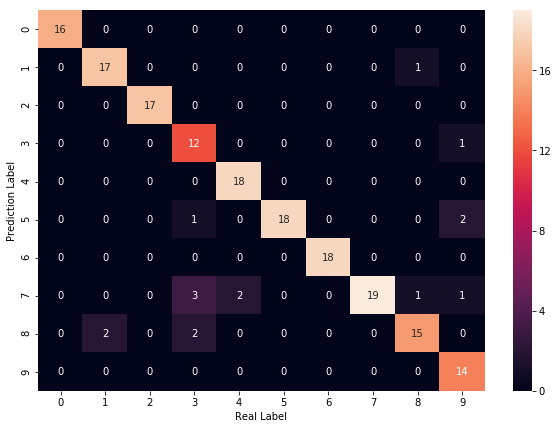

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 18., 17., 13., 18., 21., 18., 26., 19., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:152 index:[5] real:5
#1 min_error:158 index:[2] real:2
#2 min_error:158 index:[8] real:8
#3 min_error:44 index:[0] real:0
#4 min_error:131 index:[1] real:1
#5 min_error:92 index:[7] real:7
#6 min_error:77 index:[6] real:6
#7 min_error:108 index:[3] real:3
#8 min_error:82 index:[2] real:2
#9 min_error:139 index:[1] real:1
#10 min_error:170 index:[7] real:7
#11 min_error:154 index:[7] real:4
#12 min_error:88 index:[6] real:6
#13 min_error:119 index:[3] real:3
#14 min_error:122 index:[1] real:1
#15 min_error:145 index:[3] real:3
#16 min_error:163 index:[7] real:9
#17 min_error:126 index:[1] real:1
#18 min_error:141 index:[7] real:7
#19 min_error:57 index:[6] real:6
#20 min_error:143 index:[8] real:8
#21 min_error:80 index:[4] real:4
#22 min_error:109 index:[3] real:3
#23 min_error:143 index:[1] real:1
#24 min_error:71 index:[4] real:4
#25 min_error:65 index:[0] real:0
#26 min_error:105 index:[5] real:5
#27 min_error:94 index:[3] real:3
#28 min_error:133 index:[6] real:6
#29 m

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8615 Total connections::8530


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.922077922077922
Avg Base Learner:0.7835134765523359
